## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 10
---------------------------------------

GOALS:

1. Practice the principles of good data visualization.
2. Work on more advanced plotting.

----------------------------------------------------------

This homework has **2 questions** and **2 exercises**.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
file_name = 'data/brexit.csv'
DF = pd.read_csv(file_name)
DF

,vote,location,count
0,Right,total,664
1,Wrong,total,787
2,Don’t know,total,188
3,Right,london,63
4,Wrong,london,110
5,Don’t know,london,24
6,Right,rest_of_south,241
7,Wrong,rest_of_south,257
8,Don’t know,rest_of_south,49
9,Right,midlands_wales,145


## Do opinions about Brexit depend on region?

**Am I clearly answering my question with these pictures?**

In [3]:
mask = DF['location'] != 'total'
DF_plot=DF[mask]

DF_plot['location'].replace('london','London',inplace=True)
DF_plot['location'].replace('rest_of_south','Rest of South',inplace=True)
DF_plot['location'].replace('midlands_wales','Midlands and Wales',inplace=True)
DF_plot['location'].replace('north','North',inplace=True)
DF_plot['location'].replace('scot','Scotland',inplace=True)

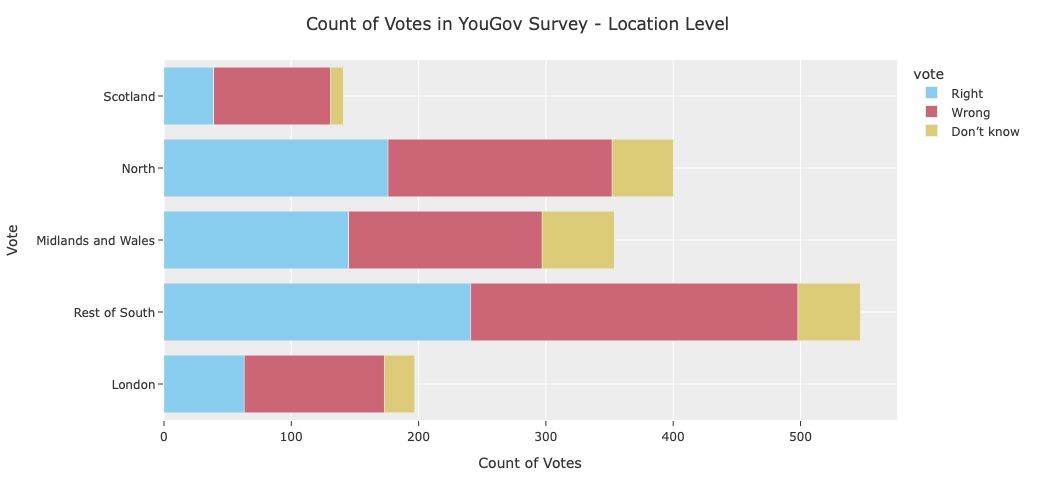

In [4]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='location',x='count',
             color='vote',
             color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories },
                  title='Count of Votes in YouGov Survey - Location Level',
                  xaxis_title="Count of Votes",
                  yaxis_title="Vote",
                  template='ggplot2',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

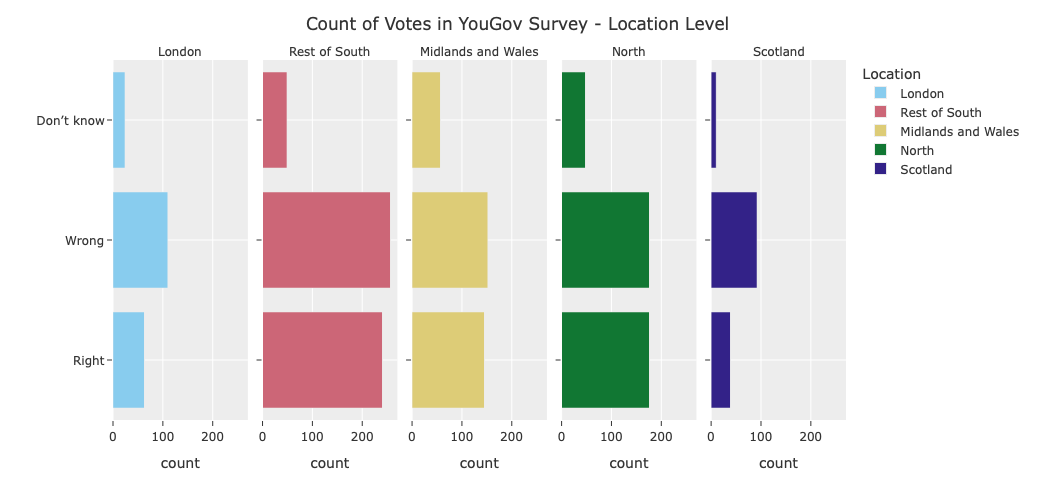

In [5]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

**Q** Which of the plots do you think is better. What you do notice are the pluses and minuses of each figure?

I think the first plot is better because we are able to see the counts of votes all in one figure and are able to compare all of them depending on the place. The pluses of the first figure is that we can easily compare all the votes just by looking at the one figure, the plus side on the second figure is that we are able to see the place counts individually and clearly see the amount of votes that voted either, yes, no, or don't know. The minuses of the first figure is that the data looks a bit clumped and the minuses on the second figure is that we aren't able to compare each country easily since everything is seperate. 

**Q** Is there any redundancy in the second graph? What is redundant?

## Avoid Redundancy

Here is the same graph again, but avoiding redundancy.

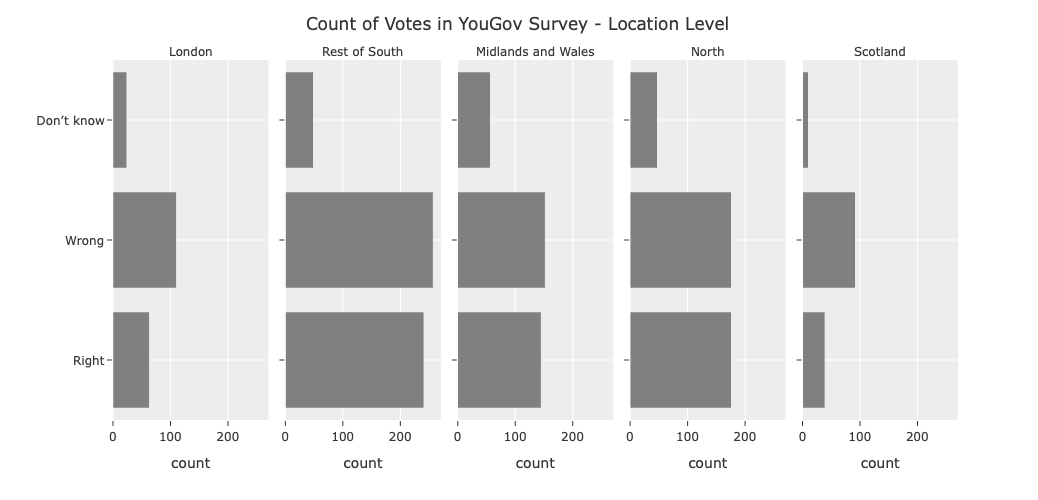

In [7]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             facet_col='location',
            color_discrete_sequence=['gray'])

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

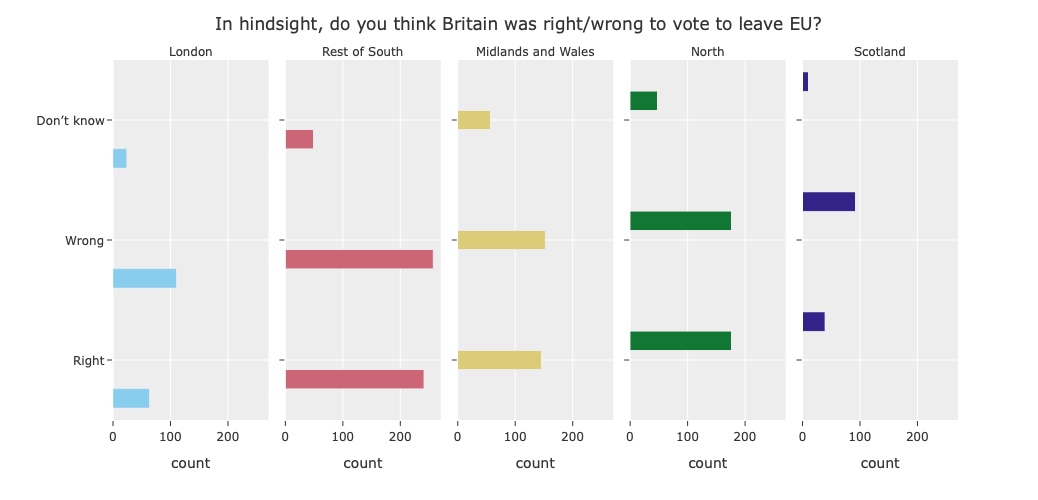

In [8]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()

**Q** Which of these two plots do you like better and why?

## Selecting meaningful colors.

[colorbrewer.org](https://colorbrewer2.org/)

Here is an example where colors were picked on the website above and the the codes were put into the color_discrete_map.

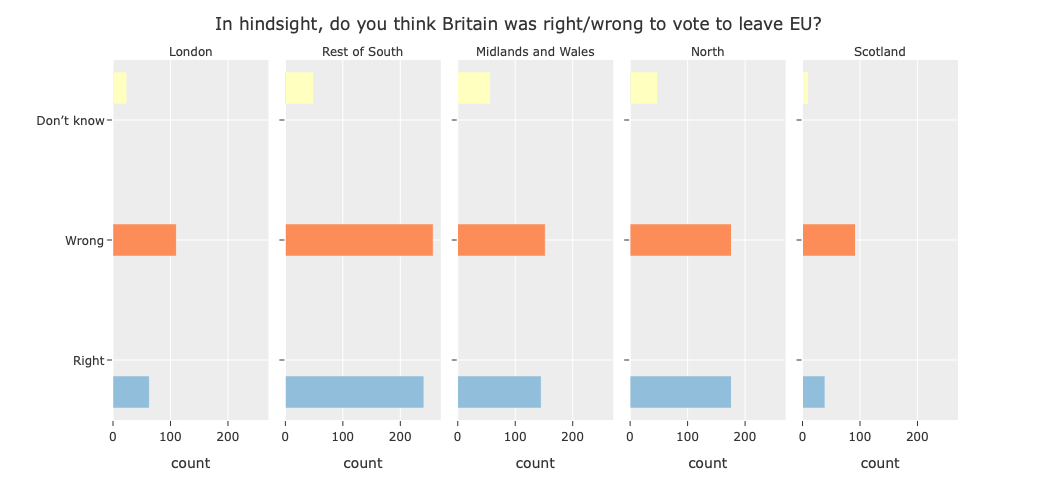

In [20]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='vote',
             facet_col='location',
             color_discrete_map={'Right':'#91bfdb','Wrong':'#fc8d59',"Don’t know":'#ffffbf'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()


### Exercise 1 (Choose one!)

#### Data Vis Principles:

1. Order Matters
2. Put long categories on the y-axis
3. Pick a Purpose.
4. Keep scales consistent
5. Select meaningful colors
6. Use meaningful and nonredundant labels.

**Option 1.** 

Create your own plot of this data. Make it as nice as possible! Choose your own colors, themes, labels, ordering, etc. Decide if you prefer facets or colored bars. Make the labels as informative as possible. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

**Option 2.**

Using data of your choice, create a beautiful data visualization. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

In [4]:
DF_plot = DF.groupby('location',as_index=False).sum().copy()

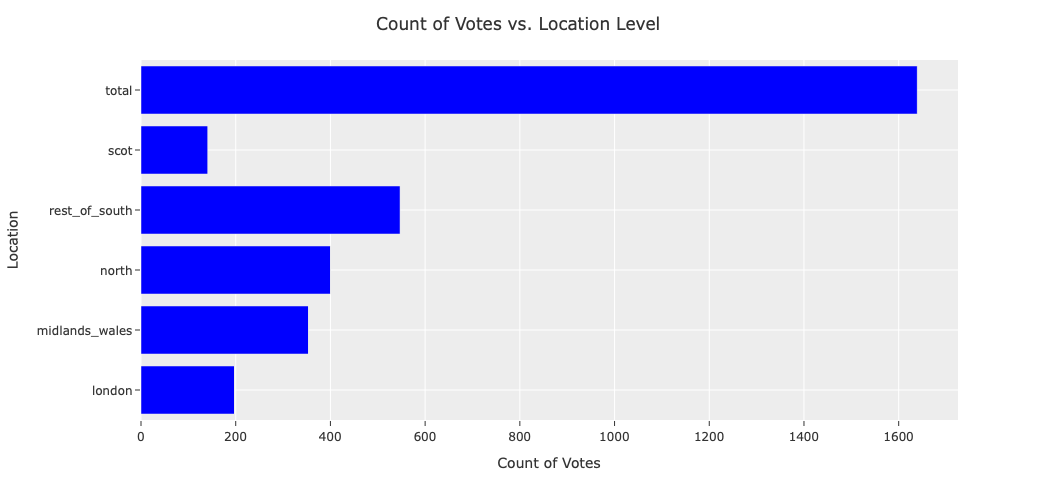

Text(0.5, -0.1, 'Figure 1: This plot illustrates the count values vs the location and region where those values are at.')

<Figure size 640x480 with 0 Axes>

In [12]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='location',x='count',color_discrete_sequence=['blue'])


fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories },
                  title='Count of Votes vs. Location Level',
                  xaxis_title="Count of Votes",
                  yaxis_title="Location",
                  template='ggplot2',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

caption_text = "Figure 1: This plot illustrates the count values vs the location and region where those values are at."
plt.figtext(0.5, -0.1, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

My figure is kind of all over the place. I tried putting a caption but the caption code changed the entire graph and how I had it laid out. The y axis is supposed to be the location/region but is showing only the the right/wrong/ or don't know votes. I tried adding a caption as nicely as possible. The graph overall was fixed and now I can see t